In [147]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()



si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,1,SIM,1,NAO FATAL,M,SIM,NÃO INFORMADO,49,21/12/1963,C,"VEIC. MOTOR. P/ TRANSP. DE CARGA, C/ PESO MAX....",0,0,AUTOMOVEL,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
1,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,2,NÃO,1,NAO FATAL,F,NÃO INFORMADO,NÃO INFORMADO,46,06/07/1966,N,NAO INFORMADO ...,0,0,,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
2,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
3,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
4,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,24,23/03/1990,AB,HABILITADO NAS CATEGORIAS A e B ...,0,0,MOTOCICLETA,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0


In [148]:


columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,90,31/12/2012 21:51,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
1,90,31/12/2012 21:51,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
2,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...
3,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...
4,132,31/12/2014 22:30,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...


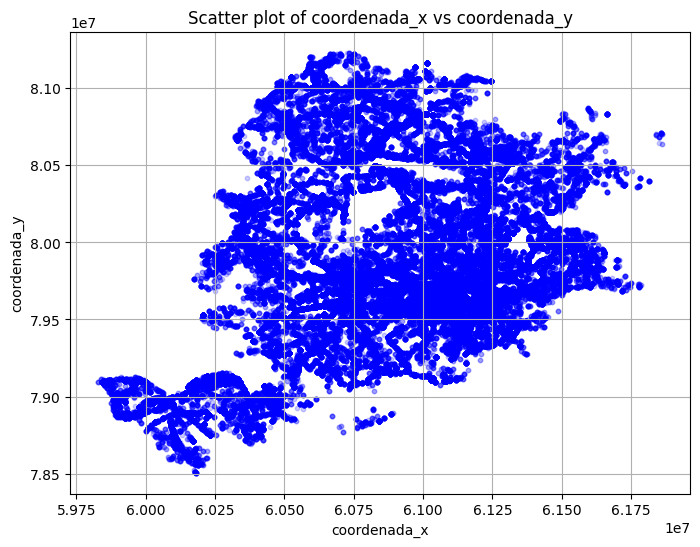

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming joined_df is your large DataFrame containing coordenada_x and coordenada_y columns
# Example DataFrame (replace this with your actual DataFrame)


filtered_df = full_df[(full_df['coordenada_x'] > 0) & (full_df['coordenada_y'] > 0)]

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(filtered_df['coordenada_x'], filtered_df['coordenada_y'], marker='o', color='b',s=10, alpha=0.2)
plt.title('Scatter plot of coordenada_x vs coordenada_y')
plt.xlabel('coordenada_x')
plt.ylabel('coordenada_y')
plt.grid(True)
plt.show()

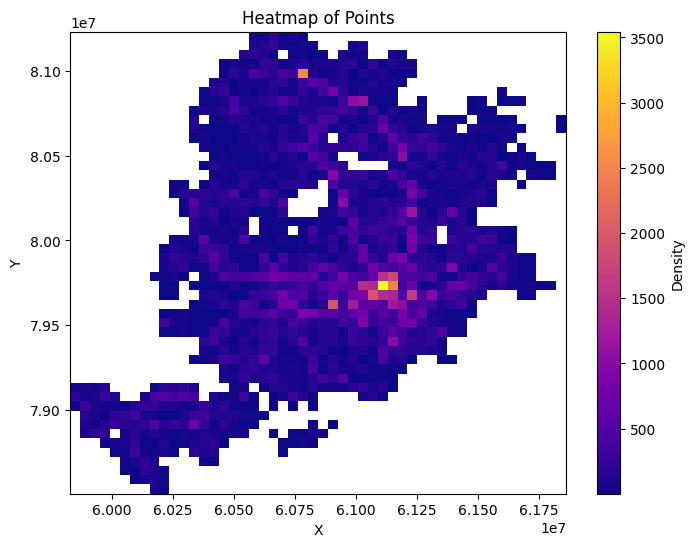

In [150]:

# Create 2D histogram (heatmap)
import numpy as np
plt.figure(figsize=(8, 6))

hist, xedges, yedges, _ = plt.hist2d(filtered_df['coordenada_x'], filtered_df['coordenada_y'], bins=50, cmap='plasma', cmin=1)
plt.colorbar(label='Density')
plt.title('Heatmap of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Clustering


In [151]:
#binning hour of day and age
clustering_df = joined_df

clustering_df['data hora_boletim'] = pd.to_datetime(clustering_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
clustering_df['hour'] = clustering_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


clustering_df['morning'] = clustering_df['hour'].apply(lambda x: True if x in morning_hours else False)
clustering_df['afternoon'] = clustering_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
clustering_df['night'] = clustering_df['hour'].apply(lambda x: True if x in night_hours else False)

clustering_df.drop(columns=['hour'], inplace=True)



In [152]:
#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

clustering_df['Idade'] =clustering_df['Idade'].astype('int')
clustering_df['children'] = clustering_df['Idade'].apply(lambda x: True if x in children else False)
clustering_df['young_adult'] = clustering_df['Idade'].apply(lambda x: True if x in young_adult else False)
clustering_df['middle_aged'] = clustering_df['Idade'].apply(lambda x: True if x in middle_aged else False)
clustering_df['old_aged'] = clustering_df['Idade'].apply(lambda x: True if x in old_aged else False)

# clustering_df.drop(columns=['Idade'], inplace=True)
clustering_df.head()

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,90,2012-12-31 21:51:00,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
1,90,2012-12-31 21:51:00,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
2,132,2014-12-31 22:30:00,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
3,132,2014-12-31 22:30:00,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
4,132,2014-12-31 22:30:00,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False


In [153]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(clustering_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()
print(true_counts)

In [ ]:
#prepping "descricao_tipo_socorro"
clustering_df['descricao_tipo_socorro'] = clustering_df['descricao_tipo_socorro'].apply(lambda x: "socorro:"+ str(x))
descricao_tipo_socorro_one_hot = pd.get_dummies(clustering_df['descricao_tipo_socorro'])
true_counts = descricao_tipo_socorro_one_hot.sum()
# print(true_counts)
descricao_tipo_socorro_one_hot.head()

,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,socorro:nan
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,True,False,False,False,False


In [ ]:
#prepping "descricao_severidade"
clustering_df['desc_severidade'] = clustering_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(clustering_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
# print(true_counts)

,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
0,False,True,False,False
1,False,True,False,False
2,False,False,False,True
3,False,False,False,True
4,False,True,False,False


In [ ]:
#prepping "descricao_situação"
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(clustering_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
print(true_counts)

EM MOVIMENTO               177435
MOVIMENTO NAO INFORMADO      5516
PARADO                      13639
dtype: int64


In [ ]:
#prepping "condutor"
# clustering_df['condutor'] = clustering_df['condutor'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
clustering_df['condutor'] = clustering_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(clustering_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
print(true_counts)

condutor:NÃO               34254
condutor:NÃO INFORMADO       244
condutor:SIM              162097
dtype: int64


In [ ]:
# Joining all one hot encoded dfs

concat_dfs= pd.concat([clustering_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       descricao_tipo_socorro_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True)],axis=1)
display(concat_dfs.head())
# display(descricao_situacao_one_hot)

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:NÃO INFORMADO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,socorro:nan,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS
0,90,2012-12-31 21:51:00,H02002,condutor:SIM,fatalidade:NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,socorro:AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,0,0,0,1,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,90,2012-12-31 21:51:00,H02002,condutor:NÃO,fatalidade:NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,socorro:AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,0,0,0,1,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,132,2014-12-31 22:30:00,H08002,condutor:SIM,fatalidade:SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,socorro:NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,0,0,0,1,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
3,132,2014-12-31 22:30:00,H08002,condutor:SIM,fatalidade:SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,socorro:AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,0,0,0,1,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,132,2014-12-31 22:30:00,H08002,condutor:SIM,fatalidade:NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,socorro:NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,0,1,0,0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
